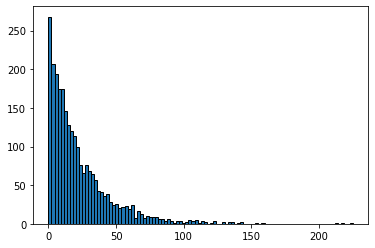

In [7]:
pltData = data[data.Calldate == "2019-03-01"]
plt.hist(pltData['Interval_Difference'],bins=100,edgecolor='black')
plt.show()



Survival Analysis

    - Survival Analysis is used to estimate the lifespan of a particular population under study. It is also called ‘Time to Event’ Analysis as the goal is to estimate the time for an individual or a group of individuals to experience an event of interest. This time estimate is the duration between birth and death events. Survival Analysis was originally developed and used by Medical Researchers and Data Analysts to measure the lifetimes of a certain population. But, over the years, it has been used in various other applications such as predicting churning customers/employees, estimation of the lifetime of a Machine, etc. The birth event can be thought of as the time of a customer starts their membership with a company, and the death event can be considered as the customer leaving the company.

    - In our context, from the perspective of a life and death scenario, the death of a call occurs when a call is received. This means that all the calls are, initially, placed at a reference life, also known as their point of birth, and these calls die after an interval, in other words, a call is received. Therefore, Survival Analysis estimates the survival or the death (aka call arrival) of the call.
    
![title](BD.png)


In [1]:
import pandas as pd
import statistics
import datetime
import matplotlib.pyplot as plt
import os
import numpy as np


The block below conducts pre-processing of the data. 
What we require are the Interval Differences between successive calls. To obtain that, we need to compute the differences between successive Dial Start rows. 

For data analysis's sake, we introduced more columns, derived from the original ones, to understand if they were statistically significant on the Interval Differences. We did not obtain a solid conclusion regarding that. 


In [2]:
data = pd.read_csv("data.csv")

def Processing_Calltime(data):
    Date = data["Calltime"].str.split(" ", n=1, expand=True)
    data["Time_of_Call"] = Date[1]
    data = data.drop(columns=["DialStart"])
    data['Hour'] = data.Time_of_Call.str[:2]
    data['Hour'] = pd.to_numeric(data['Hour'])
    
    data['Minutes'] = data.Time_of_Call.str[3:5]
    data['Minutes'] = pd.to_numeric(data['Minutes'])
    data['Seconds'] = data.Time_of_Call.str[6:]
    data['Seconds'] = pd.to_numeric(data['Seconds'])
    
    return data

def Processing_Date(data):
    Date = data["Calldate"].str.split('-', n=2, expand=True)   
    data['Year'] = Date[0]
    data['Month'] = Date[1]
    data['Day_Date'] = Date[2]
    data['Year'] = pd.to_numeric(data['Year'])
    data['Month'] = pd.to_numeric(data['Month'])
    data['Day_Date'] = pd.to_numeric(data['Day_Date'])
    return data


def Interval_Diff_Calc(data):
    Interval_Difference = [49.200555]
    ArrivalTime_Tracker = [49.200555]
    count = 0
    for i in data['ArrivalTime']:
        if count > 0:

            if i > ArrivalTime_Tracker[-1]:
                Interval_Difference.append(i - ArrivalTime_Tracker[-1])
            else:
                Interval_Difference.append(i)

            ArrivalTime_Tracker.append(i)

        count = count + 1


    data['Interval_Difference'] = Interval_Difference
    data.to_csv('Check.csv')
    return data
     
data = Processing_Calltime(data)

data = Processing_Date(data)

data = Interval_Diff_Calc(data)

data['DateTime'] = data['Calldate'] + ' ' + data.Time_of_Call.str[:5]

data


,Unnamed: 0,Calldate,ArrivalTime,Calltime,DayOfWeek,Time_of_Call,Hour,Minutes,Seconds,Year,Month,Day_Date,Interval_Difference,DateTime
0,1,2019-03-01,49.200555,2019-03-01 07:00:49,Friday,07:00:49,7,0,49,2019,3,1,49.200555,2019-03-01 07:00
1,2,2019-03-01,122.414881,2019-03-01 07:02:02,Friday,07:02:02,7,2,2,2019,3,1,73.214326,2019-03-01 07:02
2,3,2019-03-01,123.065306,2019-03-01 07:02:03,Friday,07:02:03,7,2,3,2019,3,1,0.650425,2019-03-01 07:02
3,4,2019-03-01,127.141871,2019-03-01 07:02:07,Friday,07:02:07,7,2,7,2019,3,1,4.076565,2019-03-01 07:02
4,5,2019-03-01,133.632699,2019-03-01 07:02:13,Friday,07:02:13,7,2,13,2019,3,1,6.490828,2019-03-01 07:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236998,236999,2019-05-31,57468.904985,2019-05-31 22:57:48,Friday,22:57:48,22,57,48,2019,5,31,35.677915,2019-05-31 22:57
236999,237000,2019-05-31,57484.099275,2019-05-31 22:58:04,Friday,22:58:04,22,58,4,2019,5,31,15.194290,2019-05-31 22:58
237000,237001,2019-05-31,57501.990795,2019-05-31 22:58:21,Friday,22:58:21,22,58,21,2019,5,31,17.891519,2019-05-31 22:58
237001,237002,2019-05-31,57557.442126,2019-05-31 22:59:17,Friday,22:59:17,22,59,17,2019,5,31,55.451332,2019-05-31 22:59


Survival Analysis Application

    Utilized Kaplan Meir Estimator to form a Probability Density Functions, which is a conditional distribution. 
    
    The Kaplan-Meier estimate is the simplest way of computing the survival over time It involves computing of probabilities of occurrence of event at a certain point of time and multiplying these successive probabilities by any earlier computed probabilities to get the final estimate. 

    The advantage of KMS lies in its essence of being a non-parametric estimator. Parametric Estimators assume that the data follows a certain distribution and utilizies the parameters of the distribution to obtain results. KMS, instead, form a PDF by directly computing conditional probabilities from the data. 

    Kaplan-Meier estimate is one of the best options to be used to measure the fraction of subjects living for a certain amount of time after treatment. 


![title](KF.png)



![title](Piece.png)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

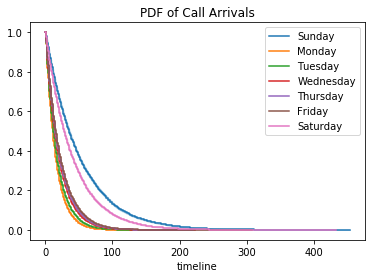

In [3]:
days = ["Sunday", "Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
for Day2 in days:
#     Day2 = input("Select the day to work with: ")
    ModdedMondays = data
    ModdedMondays = data[data['DayOfWeek'] == str(Day2)]
    import math
    ModdedMondays['Interval_Difference'] = np.ceil(ModdedMondays['Interval_Difference'])
    ModdedMondays = ModdedMondays.sort_values('Interval_Difference',ascending=True)
    ModdedMondays
    ModdedMondays['Observed'] = 1

    from lifelines import KaplanMeierFitter
    kmf2 = KaplanMeierFitter()

    kmf2.fit(ModdedMondays['Interval_Difference'], event_observed=ModdedMondays['Observed'])
    kmf2.plot(label=Day2)
    plt.title('PDF of Call Arrivals');





In [4]:
kmf2.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.976702
2.0,0.952128
3.0,0.929574
4.0,0.905426
...,...
332.0,0.000213
365.0,0.000160
411.0,0.000106


Computing Mean and Median for each day from the Survival Function:

Survival Analysis allows us to learn the probability distributions describing the
probability of a call arriving during or after a specific interval for each
day, which in-turn can be used to obtain probabilities of a call surviving/arriving after any time or between intervals. 

We can also obtain other statistics such as lambdas
that describes the average interval between two successive call, or in other words,
our exponential distribution. 


In [ ]:
t = input("Probability of Call Arriving after Time: " )
print(kmf2.predict(float(t)))



In [ ]:
t1 = input("Interval 1: " )
t2 = input("Interval 2: " )
t1 = float(t1)
t2 = float(t2)

print(kmf2.cumulative_density_at_times(t2).iloc[0]-kmf2.cumulative_density_at_times(t1).iloc[0])



In [7]:
print(Day2)
print('\t Mean : ',kmf2.survival_function_.KM_estimate.sum())
print('\t Median: ',kmf2.median_survival_time_)


Saturday
	 Mean :  40.224627659574494
	 Median:  28.0


Monday
	 Mean :  15.519203385411444
	 Median:  11.0
     
Tuesday
	 Mean :  17.543339177158984
	 Median:  12.0
     
Wednesday
	 Mean :  20.401521397983863
	 Median:  14.0
     
Thursday
	 Mean :  21.58498168498169
	 Median:  15.0

Friday
	 Mean :  22.632176326710074
	 Median:  16.0
     
Saturday
	 Mean :  40.224627659574494
	 Median:  28.0
     
Sunday
	 Mean :  50.358934903325114
	 Median:  36.0

Credits:
    
    - https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e
    - https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e
    - http://pages.stat.wisc.edu/~ifischer/Intro_Stat/Lecture_Notes/8_-_Survival_Analysis/8.2_-_Kaplan-Meier_Formula.pdf
    - http://biostat.mc.vanderbilt.edu/wiki/pub/Main/ClinStat/km.lam.pdf
    - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3059453/